<a href="https://colab.research.google.com/github/lphelpspittman/Deep_Learning_Challenge/blob/main/NN_initial_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Preprocessing

In [2]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import pandas as pd
import tensorflow as tf

# Import seaborn and assign theme
import seaborn as sns
sns.set_theme(style="darkgrid")

In [3]:
#  Import and read the charity_data.csv.
import pandas as pd
application_df = pd.read_csv("https://static.bc-edx.com/data/dl-1-2/m21/lms/starter/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


## Data Dictionary

* EIN and NAME—Identification columns
* APPLICATION_TYPE—Alphabet Soup application type
* AFFILIATION—Affiliated sector of industry
* CLASSIFICATION—Government organization classification
* USE_CASE—Use case for funding
* ORGANIZATION—Organization type
* STATUS—Active status
* INCOME_AMT—Income classification
* SPECIAL_CONSIDERATIONS—Special considerations for application
* ASK_AMT—Funding amount requested
* IS_SUCCESSFUL—Was the money used effectively

In [4]:
# explore the data
application_df.info()

# 12 columns, 8 are objects

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   EIN                     34299 non-null  int64 
 1   NAME                    34299 non-null  object
 2   APPLICATION_TYPE        34299 non-null  object
 3   AFFILIATION             34299 non-null  object
 4   CLASSIFICATION          34299 non-null  object
 5   USE_CASE                34299 non-null  object
 6   ORGANIZATION            34299 non-null  object
 7   STATUS                  34299 non-null  int64 
 8   INCOME_AMT              34299 non-null  object
 9   SPECIAL_CONSIDERATIONS  34299 non-null  object
 10  ASK_AMT                 34299 non-null  int64 
 11  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(4), object(8)
memory usage: 3.1+ MB


In [5]:
# check the mix of the target variable
application_df["IS_SUCCESSFUL"].value_counts()

# there appears to be a  good mix of successful and not successful applications

1    18261
0    16038
Name: IS_SUCCESSFUL, dtype: int64

<Axes: >

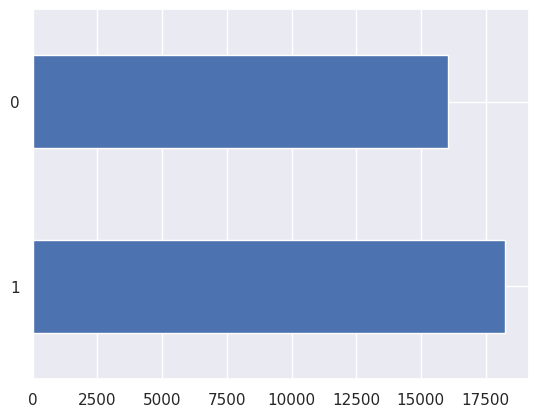

In [6]:
# visualize "IS_SUCCESSFUL" mix
application_df["IS_SUCCESSFUL"].value_counts().plot.barh()

In [7]:
# examine "EIN"
application_df["EIN"].value_counts()

10520599     1
626274659    1
630475330    1
630416100    1
630357662    1
            ..
383880377    1
383876652    1
383874900    1
383871370    1
996086871    1
Name: EIN, Length: 34299, dtype: int64

In [8]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df.drop(columns= ["EIN"], inplace=True)
application_df.info() # 11 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   NAME                    34299 non-null  object
 1   APPLICATION_TYPE        34299 non-null  object
 2   AFFILIATION             34299 non-null  object
 3   CLASSIFICATION          34299 non-null  object
 4   USE_CASE                34299 non-null  object
 5   ORGANIZATION            34299 non-null  object
 6   STATUS                  34299 non-null  int64 
 7   INCOME_AMT              34299 non-null  object
 8   SPECIAL_CONSIDERATIONS  34299 non-null  object
 9   ASK_AMT                 34299 non-null  int64 
 10  IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 2.9+ MB


In [9]:
# examine "NAME"
application_df["NAME"].value_counts()

PARENT BOOSTER USA INC                                                  1260
TOPS CLUB INC                                                            765
UNITED STATES BOWLING CONGRESS INC                                       700
WASHINGTON STATE UNIVERSITY                                              492
AMATEUR ATHLETIC UNION OF THE UNITED STATES INC                          408
                                                                        ... 
ST LOUIS SLAM WOMENS FOOTBALL                                              1
AIESEC ALUMNI IBEROAMERICA CORP                                            1
WEALLBLEEDRED ORG INC                                                      1
AMERICAN SOCIETY FOR STANDARDS IN MEDIUMSHIP & PSYCHICAL INVESTIGATI       1
WATERHOUSE CHARITABLE TR                                                   1
Name: NAME, Length: 19568, dtype: int64

In [10]:
# Drop the "NAME" column for the initial model (for simplicity)
application_df.drop(columns= ["NAME"], inplace=True)
application_df.info() #10 columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   APPLICATION_TYPE        34299 non-null  object
 1   AFFILIATION             34299 non-null  object
 2   CLASSIFICATION          34299 non-null  object
 3   USE_CASE                34299 non-null  object
 4   ORGANIZATION            34299 non-null  object
 5   STATUS                  34299 non-null  int64 
 6   INCOME_AMT              34299 non-null  object
 7   SPECIAL_CONSIDERATIONS  34299 non-null  object
 8   ASK_AMT                 34299 non-null  int64 
 9   IS_SUCCESSFUL           34299 non-null  int64 
dtypes: int64(3), object(7)
memory usage: 2.6+ MB


In [14]:
# Determine the number of unique values in each column (that is an object).
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          17
AFFILIATION                6
CLASSIFICATION            71
USE_CASE                   5
ORGANIZATION               4
INCOME_AMT                 9
SPECIAL_CONSIDERATIONS     2
dtype: int64

In [15]:
# Look at APPLICATION_TYPE value counts for binning
application_type = application_df["APPLICATION_TYPE"].value_counts()
application_type

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<Axes: ylabel='Density'>

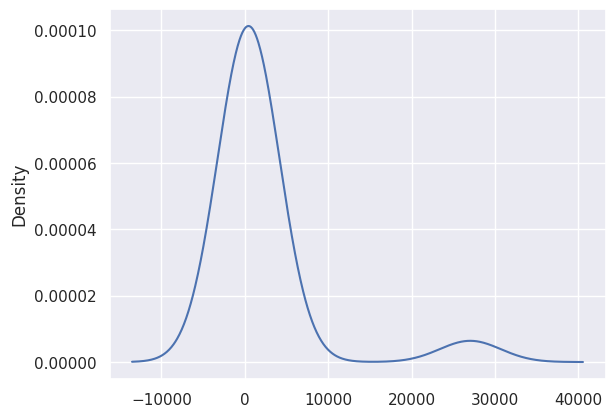

In [16]:
# Visualize the value counts of APPLICATION_TYPE
application_type.plot.density()

In [17]:
# Choose a cutoff value (500) and create a list of application types to be replaced
# use the variable name `application_types_to_replace`
application_types_to_replace = list(application_type[application_type < 500].index)
#  replace application_type

# Replace in dataframe
for app in application_types_to_replace:
    application_df['APPLICATION_TYPE'] = application_df['APPLICATION_TYPE'].replace(app,"Other")

# Check to make sure binning was successful
application_df['APPLICATION_TYPE'].value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [19]:
application_type = application_df["APPLICATION_TYPE"].value_counts()
application_type

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

<Axes: ylabel='Density'>

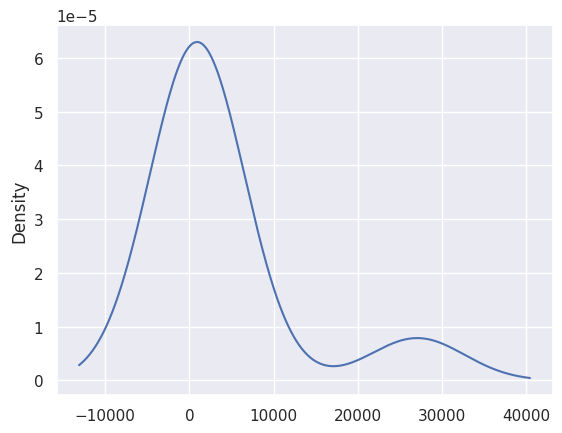

In [20]:
# view density plot
application_type.plot.density()

In [21]:
# Look at CLASSIFICATION value counts for binning
classification_type = application_df["CLASSIFICATION"].value_counts()
classification_type

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<Axes: ylabel='Density'>

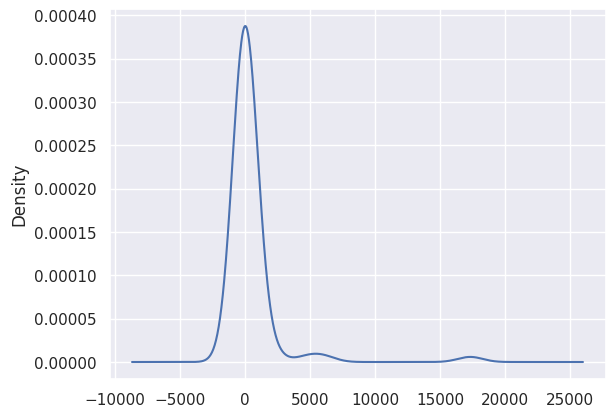

In [22]:
# visualize the value_counts of CLASSIFICATION
classification_type.plot.density()

In [25]:
# You may find it helpful to look at CLASSIFICATION value counts >1
classifications_to_replace_1 = list(classification_type[classification_type == 1].index)
classifications_to_replace_1

['C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [26]:
# Determine which values to replace (start at 500)
classifications_to_replace = list(classification_type[classification_type < 500].index)
classifications_to_replace

['C1700',
 'C4000',
 'C5000',
 'C1270',
 'C2700',
 'C2800',
 'C7100',
 'C1300',
 'C1280',
 'C1230',
 'C1400',
 'C7200',
 'C2300',
 'C1240',
 'C8000',
 'C7120',
 'C1500',
 'C1800',
 'C6000',
 'C1250',
 'C8200',
 'C1238',
 'C1278',
 'C1235',
 'C1237',
 'C7210',
 'C2400',
 'C1720',
 'C4100',
 'C1257',
 'C1600',
 'C1260',
 'C2710',
 'C0',
 'C3200',
 'C1234',
 'C1246',
 'C1267',
 'C1256',
 'C2190',
 'C4200',
 'C2600',
 'C5200',
 'C1370',
 'C1248',
 'C6100',
 'C1820',
 'C1900',
 'C1236',
 'C3700',
 'C2570',
 'C1580',
 'C1245',
 'C2500',
 'C1570',
 'C1283',
 'C2380',
 'C1732',
 'C1728',
 'C2170',
 'C4120',
 'C8210',
 'C2561',
 'C4500',
 'C2150']

In [27]:
# Choose a cutoff value and create a list of classifications to be replaced
# use the variable name `classifications_to_replace`
classifications_to_replace = list(classification_type[classification_type < 500].index)

# Replace in dataframe
for cls in classifications_to_replace:
    application_df['CLASSIFICATION'] = application_df['CLASSIFICATION'].replace(cls,"Other")

# Check to make sure binning was successful
application_df['CLASSIFICATION'].value_counts()

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
Other     1484
C7000      777
Name: CLASSIFICATION, dtype: int64

<Axes: ylabel='Density'>

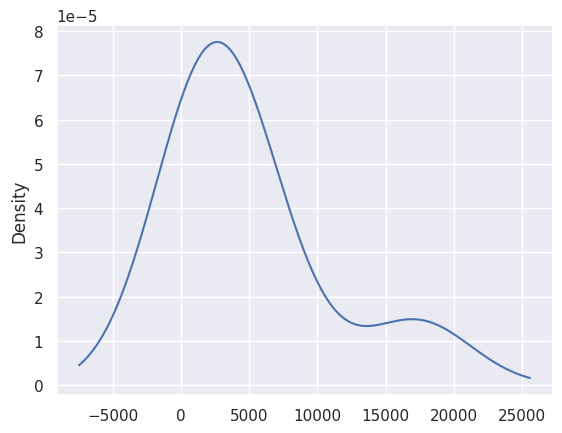

In [28]:
# Visualize the value counts of CLASSIFICATION after binning
application_df["CLASSIFICATION"].value_counts().plot.density()

In [ ]:
# Convert categorical data to numeric with `pd.get_dummies`
#  YOUR CODE GOES HERE

In [29]:
# use onehotencoder from sklearn
# look at the categorical columns that I need to transform
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_df[application_cat].nunique()

APPLICATION_TYPE          9
AFFILIATION               6
CLASSIFICATION            7
USE_CASE                  5
ORGANIZATION              4
INCOME_AMT                9
SPECIAL_CONSIDERATIONS    2
dtype: int64

In [31]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [32]:
encode_df.shape

(34299, 42)

In [33]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat, axis= 1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [34]:
# check that all columns are numeric
application_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34299 entries, 0 to 34298
Data columns (total 45 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   STATUS                        34299 non-null  int64  
 1   ASK_AMT                       34299 non-null  int64  
 2   IS_SUCCESSFUL                 34299 non-null  int64  
 3   APPLICATION_TYPE_Other        34299 non-null  float64
 4   APPLICATION_TYPE_T10          34299 non-null  float64
 5   APPLICATION_TYPE_T19          34299 non-null  float64
 6   APPLICATION_TYPE_T3           34299 non-null  float64
 7   APPLICATION_TYPE_T4           34299 non-null  float64
 8   APPLICATION_TYPE_T5           34299 non-null  float64
 9   APPLICATION_TYPE_T6           34299 non-null  float64
 10  APPLICATION_TYPE_T7           34299 non-null  float64
 11  APPLICATION_TYPE_T8           34299 non-null  float64
 12  AFFILIATION_CompanySponsored  34299 non-null  float64
 13  A

In [36]:
from sqlalchemy.sql.expression import values
# Split our preprocessed data into our features (X) and target (y) arrays
y= application_df["IS_SUCCESSFUL"].values
X= application_df.drop(["IS_SUCCESSFUL"], axis=1).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=5)

In [37]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

## Compile, Train and Evaluate the Model

In [38]:
# check the number of features in X (needed for input in NN model below)
len(X_train[0])

44

In [40]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = (number_input_features * 3)
hidden_nodes_layer2 = (number_input_features * 0.5)

nn_initial = tf.keras.models.Sequential()

# First hidden layer
nn_initial.add(
    tf.keras.layers.Dense(
        units=hidden_nodes_layer1,
        input_dim=number_input_features,
        activation="relu")
)

# Second hidden layer
nn_initial.add(tf.keras.layers.Dense(
    units=hidden_nodes_layer2,
    activation="relu")
)

# Output layer
nn_initial.add(tf.keras.layers.Dense(
    units=1,
    activation="sigmoid")
)

# Check the structure of the model
nn_initial.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 132)               5940      
                                                                 
 dense_1 (Dense)             (None, 22)                2926      
                                                                 
 dense_2 (Dense)             (None, 1)                 23        
                                                                 
Total params: 8,889
Trainable params: 8,889
Non-trainable params: 0
_________________________________________________________________


In [43]:
# Compile the model
nn_initial.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [44]:
# Train the model
fit_model_initial = nn_initial.fit(X_train_scaled,y_train,epochs=100)

Epoch 1/100
804/804 [==============================] - 3s 2ms/step - loss: 0.5658 - accuracy: 0.7213
Epoch 2/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5528 - accuracy: 0.7297
Epoch 3/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5498 - accuracy: 0.7299
Epoch 4/100
804/804 [==============================] - 2s 3ms/step - loss: 0.5484 - accuracy: 0.7304
Epoch 5/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5470 - accuracy: 0.7308
Epoch 6/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5456 - accuracy: 0.7338
Epoch 7/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5454 - accuracy: 0.7339
Epoch 8/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5449 - accuracy: 0.7331
Epoch 9/100
804/804 [==============================] - 2s 2ms/step - loss: 0.5440 - accuracy: 0.7341
Epoch 10/100
804/804 [==============================] - 3s 3ms/step - loss: 0.5430 - accura

In [45]:
# Evaluate the model using the test data
model_loss, model_accuracy = nn_initial.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5652 - accuracy: 0.7269 - 560ms/epoch - 2ms/step
Loss: 0.5652453303337097, Accuracy: 0.7268804907798767


<Axes: >

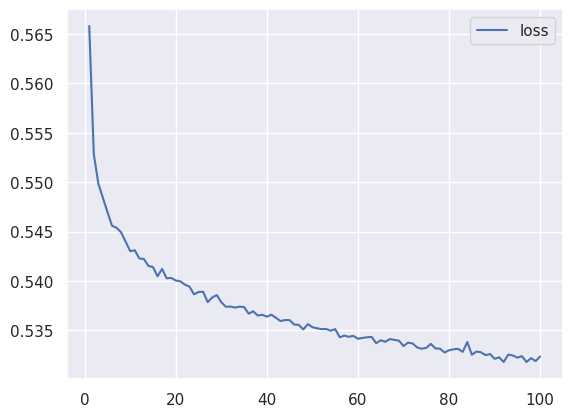

In [46]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model_initial.history, index=range(1,len(fit_model_initial.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<Axes: >

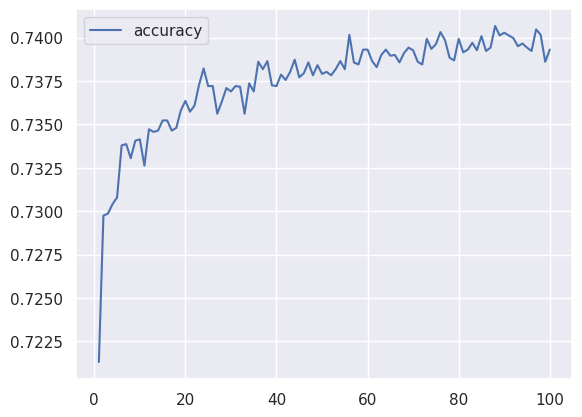

In [47]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [48]:
# Export our model to HDF5 file
# export the fully trained model to HDF5 file
# note: The Hierarchical Data Format version 5 (HDF5), is an open source file format that supports large, complex, heterogeneous data.

nn_initial.save("./Trained_Models/AlphabetSoupCharity.h5") # redundant by my preference to save to a folder
nn_initial.save("./AlphabetSoupCharity.h5")

In [49]:
# Import the model to a new object
nn_imported = tf.keras.models.load_model('./Trained_Models/AlphabetSoupCharity.h5')

In [50]:
# view model
nn_imported.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 132)               5940      
                                                                 
 dense_1 (Dense)             (None, 22)                2926      
                                                                 
 dense_2 (Dense)             (None, 1)                 23        
                                                                 
Total params: 8,889
Trainable params: 8,889
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Evaluate the imported model using the test data
model_loss, model_accuracy = nn_imported.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5652 - accuracy: 0.7269 - 712ms/epoch - 3ms/step
Loss: 0.5652453303337097, Accuracy: 0.7268804907798767
